# Entrega 1

##  Contexto 

En el este notebook se tratarán los datos extraidos desde un trabajo de Pattern Matching realizado en la plataforma online de arbimon.org de la Rainforest Connection (RFCx) la cual es una organización que busca construir e implementar sistemas de monitoreo acústico abiertos y escalables que puedan detener la tala ilegal y la caza furtiva, y pudiendo permitir la medición y el monitoreo de la biodiversidad.

Es en este último punto en el cual se enfoca el presente análisis, en el cual para estimar la diversidad de especies se realizó un análisis de Pattern Matching. Este consiste en contruir un template o molde para cada especie de ave posible que habita el área de estudio, luego se construye un playlist con los audios en los cuales se quieren encontrar las coinsidencias con los templates creados. Finalmente se deben validar de forma manual las coinsidencias, asignandoles uno de tres estados; presente, no presente o no validado.  

Los resultados de este análisis se pueden descargar en un archivo csv por cada template (uno por cada especie de ave) en el cual cada registro contiene los siguientes campos:

* **id:** identificador único de cada coincidencia, validada o no.
* **recording:** nombre de la grabación donde se encontró la coincidencia
* **site:** nombre del sitio de la grabación
* **fecha:** year, month, day, hour, minute
* **species:** nombre científico de la especie 
* **songtype:** tipo de vocalización del ave
* **x1, x2:** tiempo de inicio y fin de la conicidencia
* **y1, y2:** frecuancias máxima y mínima de la coincidencia
* **validated:** present, not present o (not validated)
* **url:** url de la grabación
* **score:** puntaje de la considencia que va de 0 a 1, siendo 1 la coincidencia máxima
* **site_id:** identifacador único del sitio



## Preguntas

### Respecto a las especies

1. ¿Cuántas especies se encontraron?
2. ¿Cuáles son las especies más abundates?


### Respecto al tiempo

1. ¿Cual día es el con más presencia de especies?
2. ¿Cómo varía el número de especies presentes a lo largo de los días?
3. ¿Cómo varía el número de especies presentes cada 24 horas?


### Respecto al espacio

1. ¿En que sitios se detectó la presencia de más especies?
2. ¿Existe algún patrón espacial en la presencia de especies?

## Índice

### 1. Limpieza
* Unir todos los datos
* crear reporte para comparar con datos anteriores
* buscar nulos
* crear columna datetime
* Eliminar columnas no necesarias
* Guardar como .csv


### 2. Formato
* resamplear cada 5 min
* ver como tratar los NaN
* hacer columna species_cont (conteo de especies)
* darle formato de df_limpio


### 3. EDA
* Respecto a las especies
* Respecto al tiempo
* Respecto al espacio

### 1. Limpieza

In [1]:
# importar y unir csv

import pandas as pd
import glob
import os

# Ruta de la carpeta donde están los CSV de cada especie
carpeta = r'C:\Users\camil\OneDrive - Universidad Austral de Chile\analisis_tesis\riqueza\chanchan_015'  

# Buscar todos los archivos CSV en la carpeta
archivos_csv = glob.glob(os.path.join(carpeta, '*.csv'))

# Leer y concatenar todos los CSV en un solo DataFrame
df = pd.concat([pd.read_csv(f) for f in archivos_csv], ignore_index=True)

# Guardar el DataFrame combinado en un nuevo CSV
df.to_csv(r'C:\Users\camil\OneDrive - Universidad Austral de Chile\analisis_tesis\riqueza\reporte_riqueza.csv', index=False)


In [ ]:
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112098 entries, 0 to 112097
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         112098 non-null  int64  
 1   recording  112098 non-null  object 
 2   site       112098 non-null  object 
 3   year       112098 non-null  int64  
 4   month      112098 non-null  int64  
 5   day        112098 non-null  int64  
 6   hour       112098 non-null  int64  
 7   minute     112098 non-null  int64  
 8   species    112098 non-null  object 
 9   songtype   112098 non-null  object 
 10  x1         112098 non-null  float64
 11  x2         112098 non-null  float64
 12  y1         112098 non-null  int64  
 13  y2         112098 non-null  int64  
 14  frequency  112098 non-null  int64  
 15  validated  112098 non-null  object 
 16  url        112098 non-null  object 
 17  score      112098 non-null  float64
 18  site_id    112098 non-null  int64  
dtypes: float64(3), int64(10

In [ ]:
# Esto mostrará únicamente las filas que tienen uno o más valores faltantes (NaN o None) en cualquier columna del DataFrame

registros_con_nulos = df[df.isnull().any(axis=1)]
print(registros_con_nulos)


Empty DataFrame
Columns: [id, recording, site, year, month, day, hour, minute, species, songtype, x1, x2, y1, y2, frequency, validated, url, score, site_id, presencia]
Index: []


In [4]:
# limpieza de columnas, y creación de columna datetime

file_path = r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\riqueza.csv' #Cargar data limpia y sin NaN

df = pd.read_csv(file_path)
#df.head()
#df.info()

In [5]:
# crear columna datetime a partir de las columnas year, month, day, hour y minute

df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df.head()

,id,recording,site,year,month,day,hour,minute,species,songtype,...,x2,y1,y2,frequency,validated,url,score,site_id,presencia,datetime
0,627470889,SMM09557_20231009_185000.wav,P04_SMM09557,2023,10,9,18,50,Theristicus melanopis,Common Song,...,25.461333,796.875,2390.625,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.308460,48814,1,2023-10-09 18:50:00
1,627471573,SMM09261_20231010_002000.wav,P02_SMM09261,2023,10,10,2,20,Theristicus melanopis,Common Song,...,26.581333,796.875,2390.625,12000,(not validated),https://rfcx-streams-production.s3.eu-west-1.a...,0.315499,49108,0,2023-10-10 02:20:00
2,627471783,SMM09261_20231008_051500.wav,P02_SMM09261,2023,10,8,7,15,Theristicus melanopis,Common Song,...,37.365333,796.875,2390.625,12000,(not validated),https://rfcx-streams-production.s3.eu-west-1.a...,0.409870,49108,0,2023-10-08 07:15:00
3,627472803,SMM09687_20231008_022500.wav,P.568_SMM09687,2023,10,8,2,25,Theristicus melanopis,Common Song,...,54.613333,796.875,2390.625,12000,(not validated),https://rfcx-streams-production.s3.eu-west-1.a...,0.336434,48795,0,2023-10-08 02:25:00
4,627472806,SMM09261_20231008_003500.wav,P02_SMM09261,2023,10,8,2,35,Theristicus melanopis,Common Song,...,30.954667,796.875,2390.625,12000,(not validated),https://rfcx-streams-production.s3.eu-west-1.a...,0.439855,49108,0,2023-10-08 02:35:00


In [6]:
# eliminar columnas innecesarias
## las siguientes columnas no son necesarias para el análisis, ya que están fuera de los objetivos del proyecto.

df = df.drop(columns=['songtype', 'x1', 'x2', 'y1', 'y2'])
df.head()

,id,recording,site,year,month,day,hour,minute,species,frequency,validated,url,score,site_id,presencia,datetime
0,627470889,SMM09557_20231009_185000.wav,P04_SMM09557,2023,10,9,18,50,Theristicus melanopis,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.308460,48814,1,2023-10-09 18:50:00
1,627471573,SMM09261_20231010_002000.wav,P02_SMM09261,2023,10,10,2,20,Theristicus melanopis,12000,(not validated),https://rfcx-streams-production.s3.eu-west-1.a...,0.315499,49108,0,2023-10-10 02:20:00
2,627471783,SMM09261_20231008_051500.wav,P02_SMM09261,2023,10,8,7,15,Theristicus melanopis,12000,(not validated),https://rfcx-streams-production.s3.eu-west-1.a...,0.409870,49108,0,2023-10-08 07:15:00
3,627472803,SMM09687_20231008_022500.wav,P.568_SMM09687,2023,10,8,2,25,Theristicus melanopis,12000,(not validated),https://rfcx-streams-production.s3.eu-west-1.a...,0.336434,48795,0,2023-10-08 02:25:00
4,627472806,SMM09261_20231008_003500.wav,P02_SMM09261,2023,10,8,2,35,Theristicus melanopis,12000,(not validated),https://rfcx-streams-production.s3.eu-west-1.a...,0.439855,49108,0,2023-10-08 02:35:00


In [ ]:
import sweetviz as sv

# Crear un reporte exploratorio con Sweetviz
reporte = sv.analyze(df)

# Guardar el reporte en un archivo HTML
reporte.show_html("reporte_exploratorio.html")

                                             |          | [  0%]   00:00 -> (? left)

Report reporte_exploratorio.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


html reporte = 
file:///C:/Users/camil/OneDrive%20-%20Universidad%20Austral%20de%20Chile/datascience1/proyectoDS_parte1/Data_Science_ll/pre_entregas/reporte_exploratorio.html

**Insights**

* 27.224 registros
    * not present   12,165  45%
    * (not validated)   9,833   36%
    * present   5,226   19%

* 24 sitios
* 34 especies distintas
    1. Pygarrhichas albogularis
    2. Colaptes pitius
    3. Scelorchilus rubecola


* Score
    * MAX   0.956
    * MIN   0.200
    * AVG   0.351
    * MEDIAN    0.337



Los valores pueden existir en uno de tres estados; present, not present y (not validated).
Por lo tanto en los valores de 'species' estan considerados registros que no han sido validados por un revisor.

Se creará un df dejando fuera los registros en estado de (not validated) y se rehará el reporte exploratorio.

In [7]:
df_validated = df[df['validated'] != '(not validated)']
df_validated.head()

,id,recording,site,year,month,day,hour,minute,species,frequency,validated,url,score,site_id,presencia,datetime
0,627470889,SMM09557_20231009_185000.wav,P04_SMM09557,2023,10,9,18,50,Theristicus melanopis,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.308460,48814,1,2023-10-09 18:50:00
12,627488167,SMM09309_20231010_122000.wav,P39_SMM09309,2023,10,10,12,20,Theristicus melanopis,12000,not present,https://rfcx-streams-production.s3.eu-west-1.a...,0.319604,48993,0,2023-10-10 12:20:00
13,627488435,SMM09360_20231010_144000.wav,P23_SMM09360,2023,10,10,14,40,Theristicus melanopis,12000,not present,https://rfcx-streams-production.s3.eu-west-1.a...,0.320364,48816,0,2023-10-10 14:40:00
14,627488436,SMM09360_20231010_144500.wav,P23_SMM09360,2023,10,10,14,45,Theristicus melanopis,12000,not present,https://rfcx-streams-production.s3.eu-west-1.a...,0.347267,48816,0,2023-10-10 14:45:00
15,627488437,SMM09360_20231010_100500.wav,P23_SMM09360,2023,10,10,10,5,Theristicus melanopis,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.323306,48816,1,2023-10-10 10:05:00


Con df_validated se da fin al proceso de limpieza y preparación de los datos. en consecuencia se procederá a salvar el df en un archivo CSV para ser utilizado de aquí en adelante.

In [8]:
df_validated.to_csv(r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\riqueza_validada.csv', index=False)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el archivo CSV limpio y validado
data_path = r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\riqueza_validada.csv'

data = pd.read_csv(data_path)

In [10]:
data.head()

,id,recording,site,year,month,day,hour,minute,species,frequency,validated,url,score,site_id,presencia,datetime
0,627470889,SMM09557_20231009_185000.wav,P04_SMM09557,2023,10,9,18,50,Theristicus melanopis,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.308460,48814,1,2023-10-09 18:50:00
1,627488167,SMM09309_20231010_122000.wav,P39_SMM09309,2023,10,10,12,20,Theristicus melanopis,12000,not present,https://rfcx-streams-production.s3.eu-west-1.a...,0.319604,48993,0,2023-10-10 12:20:00
2,627488435,SMM09360_20231010_144000.wav,P23_SMM09360,2023,10,10,14,40,Theristicus melanopis,12000,not present,https://rfcx-streams-production.s3.eu-west-1.a...,0.320364,48816,0,2023-10-10 14:40:00
3,627488436,SMM09360_20231010_144500.wav,P23_SMM09360,2023,10,10,14,45,Theristicus melanopis,12000,not present,https://rfcx-streams-production.s3.eu-west-1.a...,0.347267,48816,0,2023-10-10 14:45:00
4,627488437,SMM09360_20231010_100500.wav,P23_SMM09360,2023,10,10,10,5,Theristicus melanopis,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.323306,48816,1,2023-10-10 10:05:00


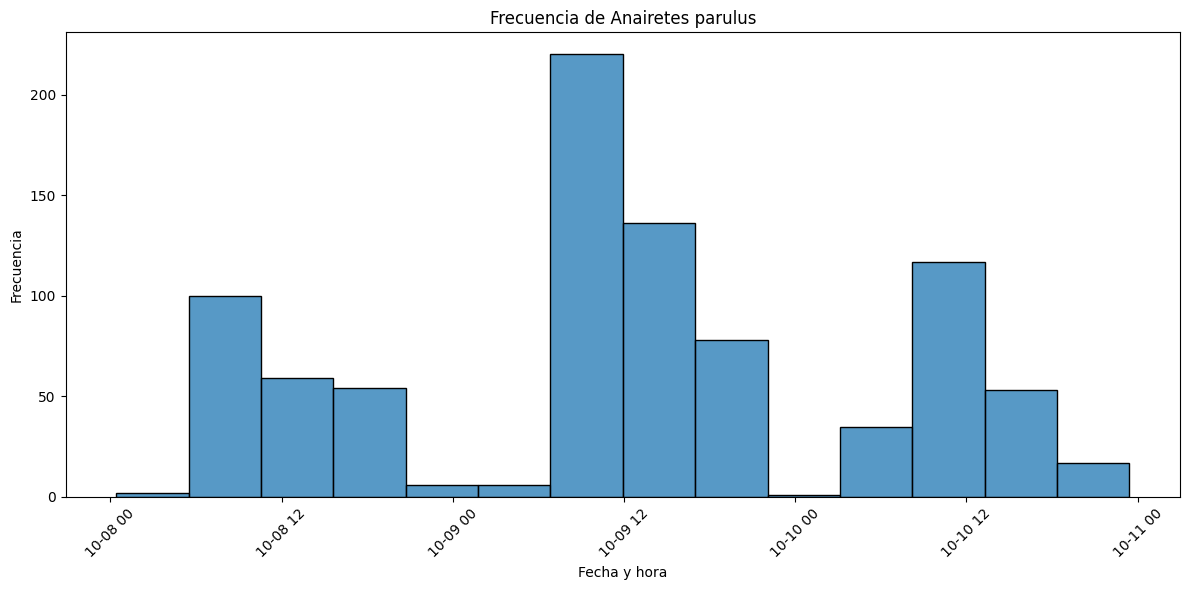

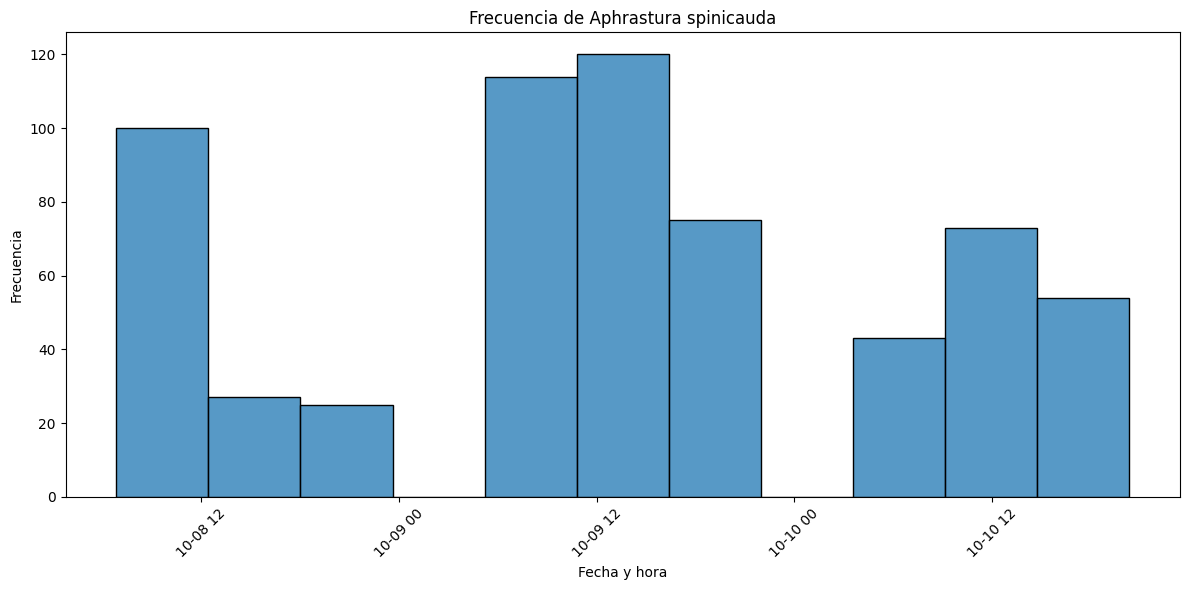

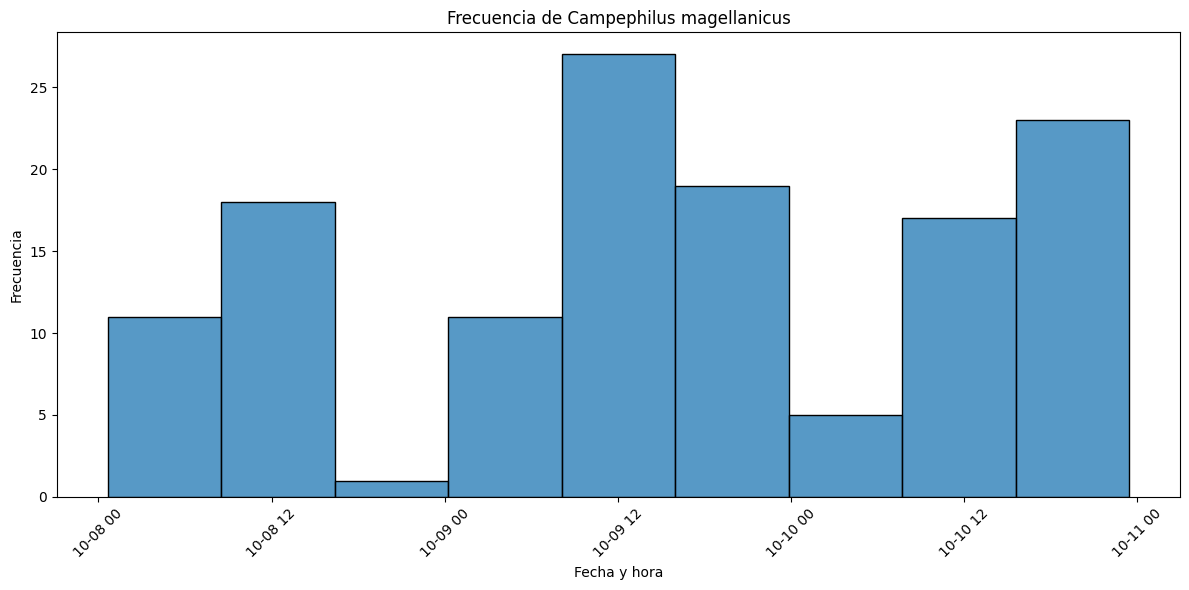

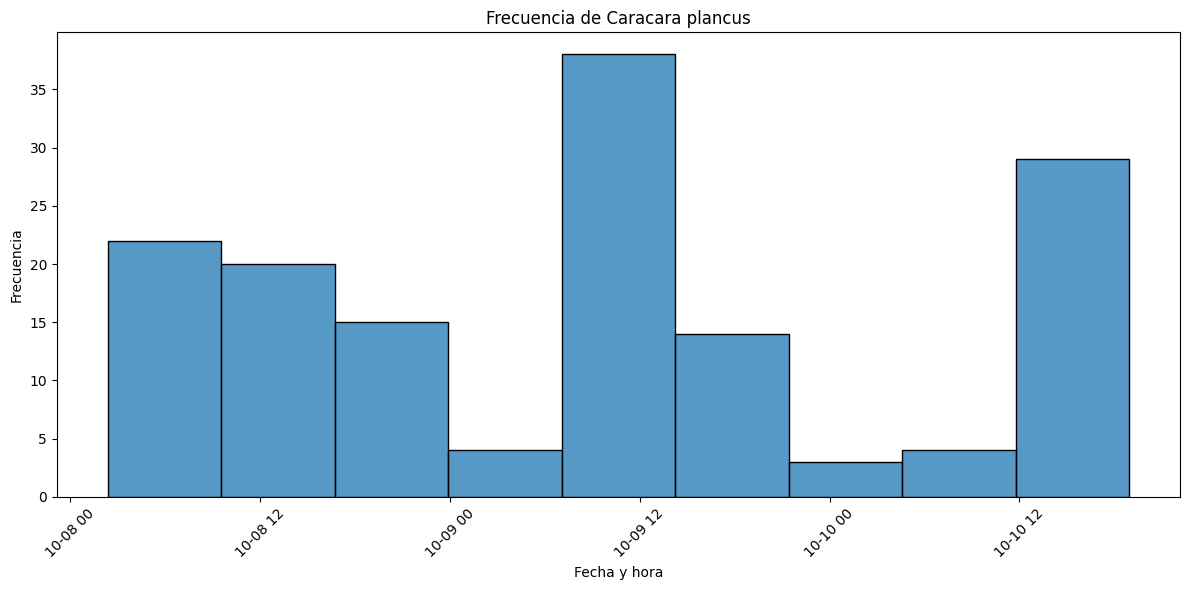

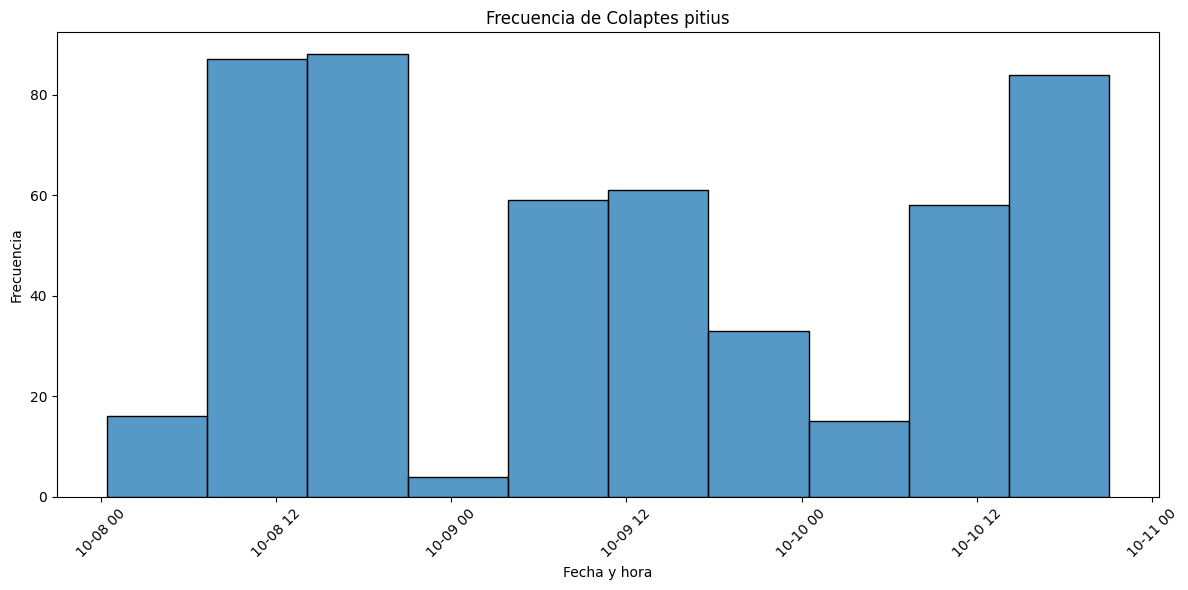

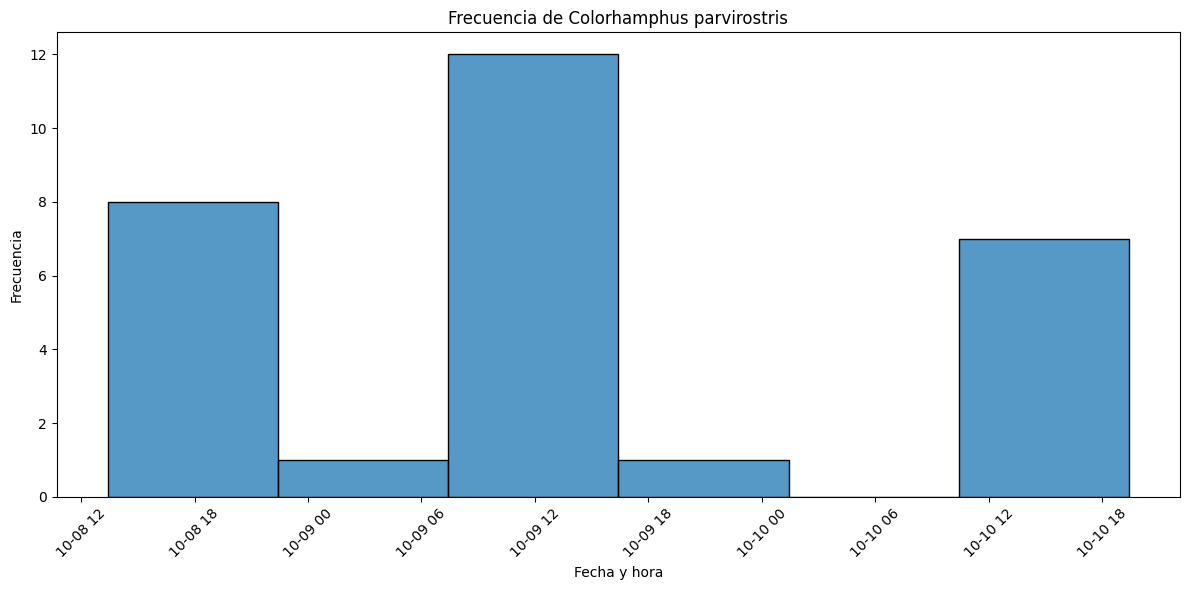

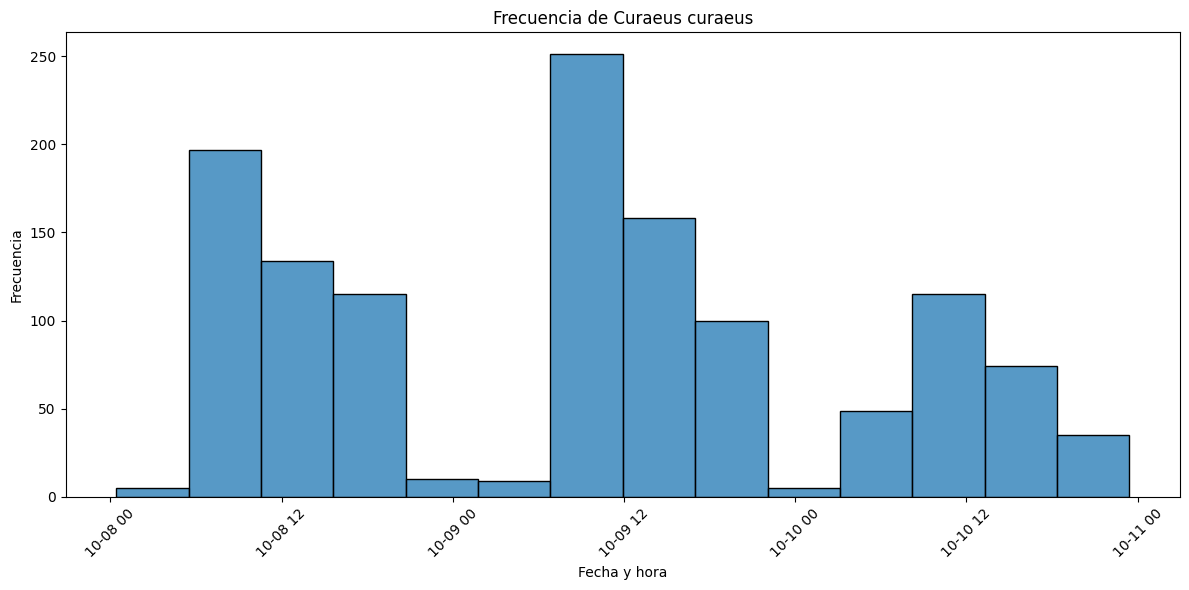

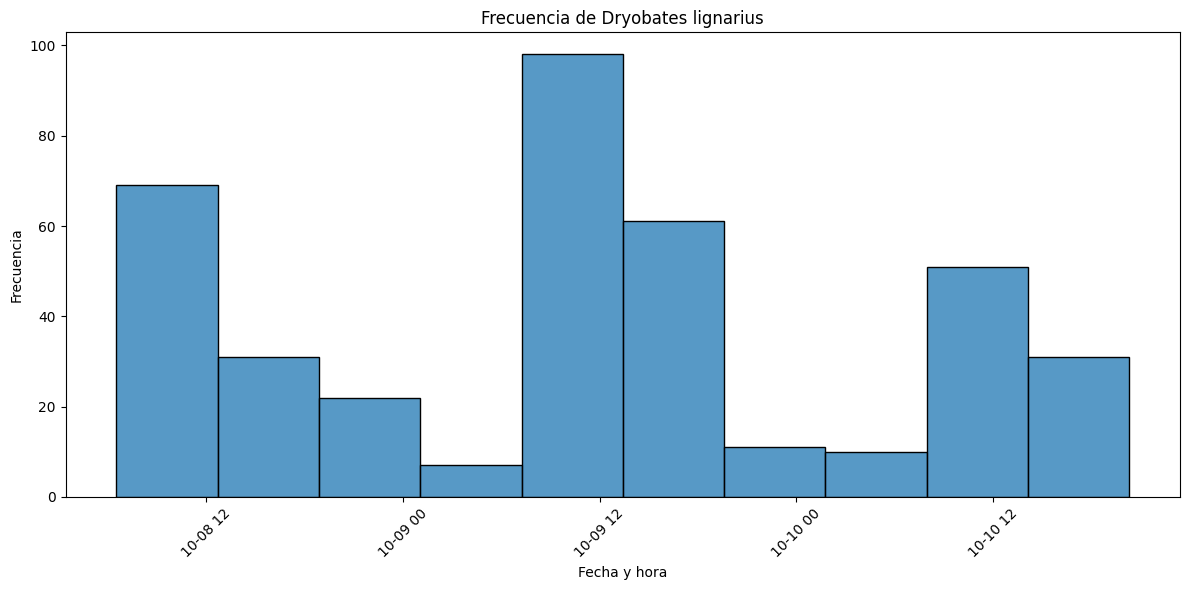

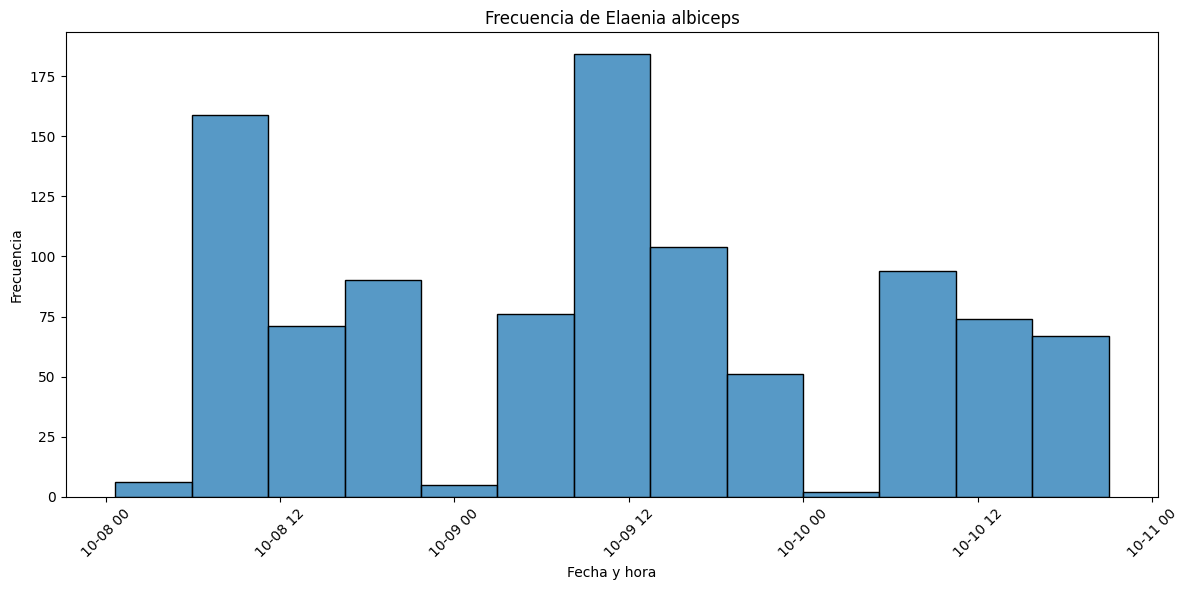

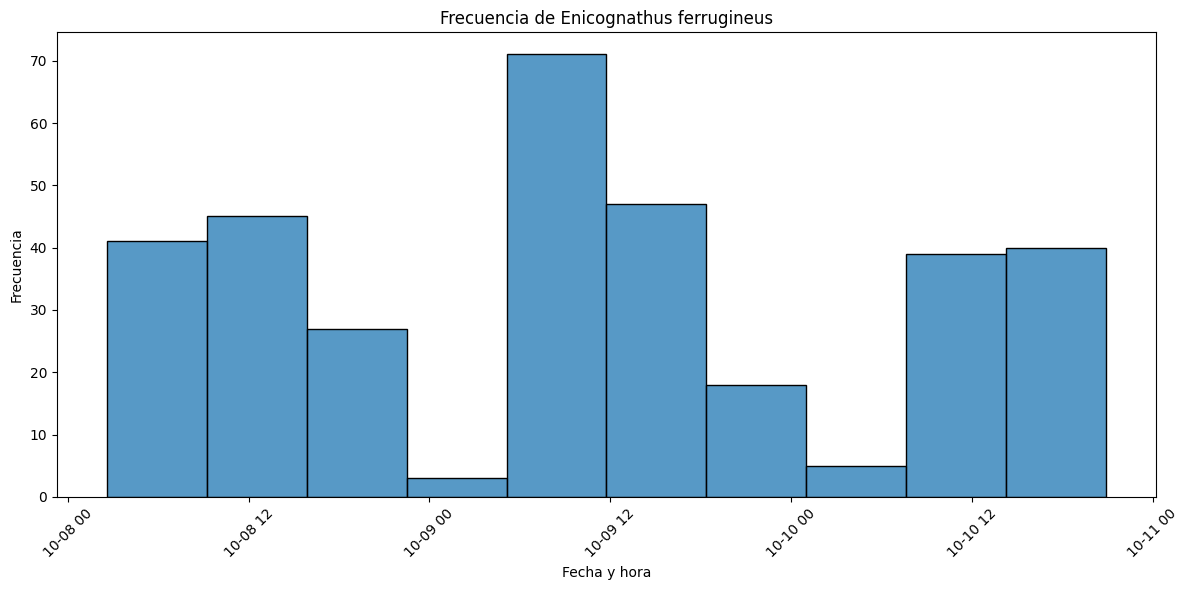

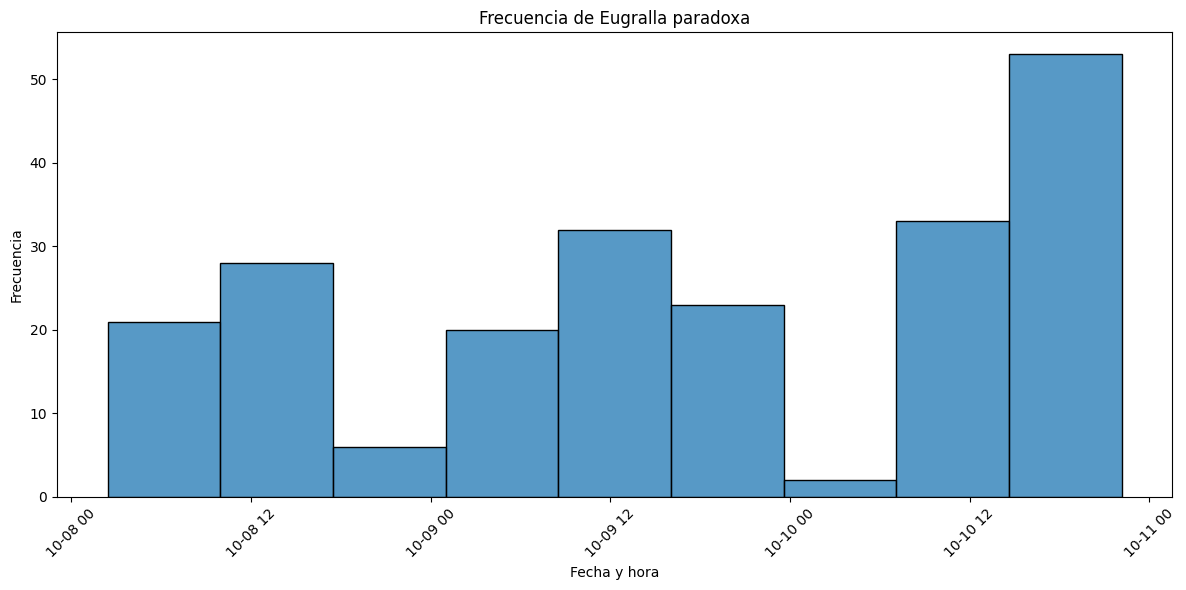

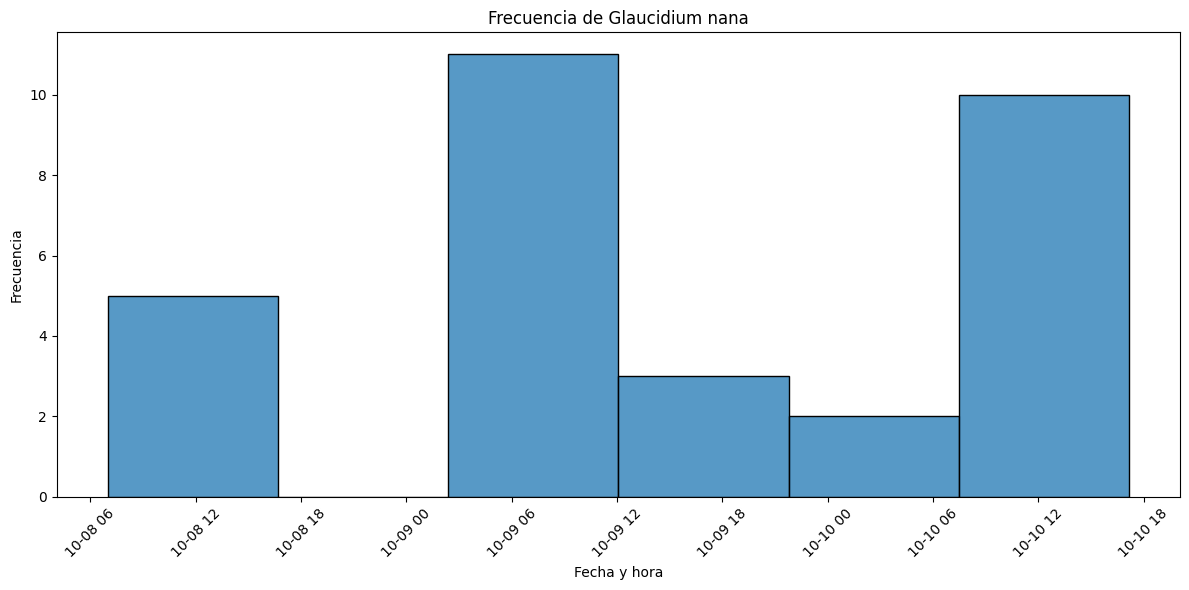

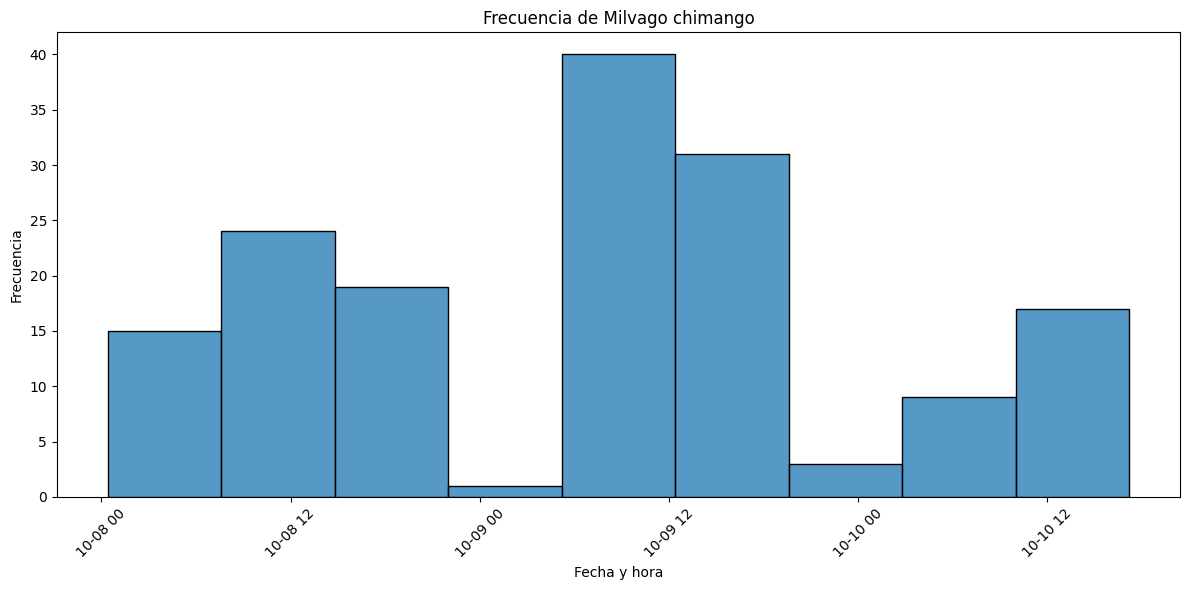

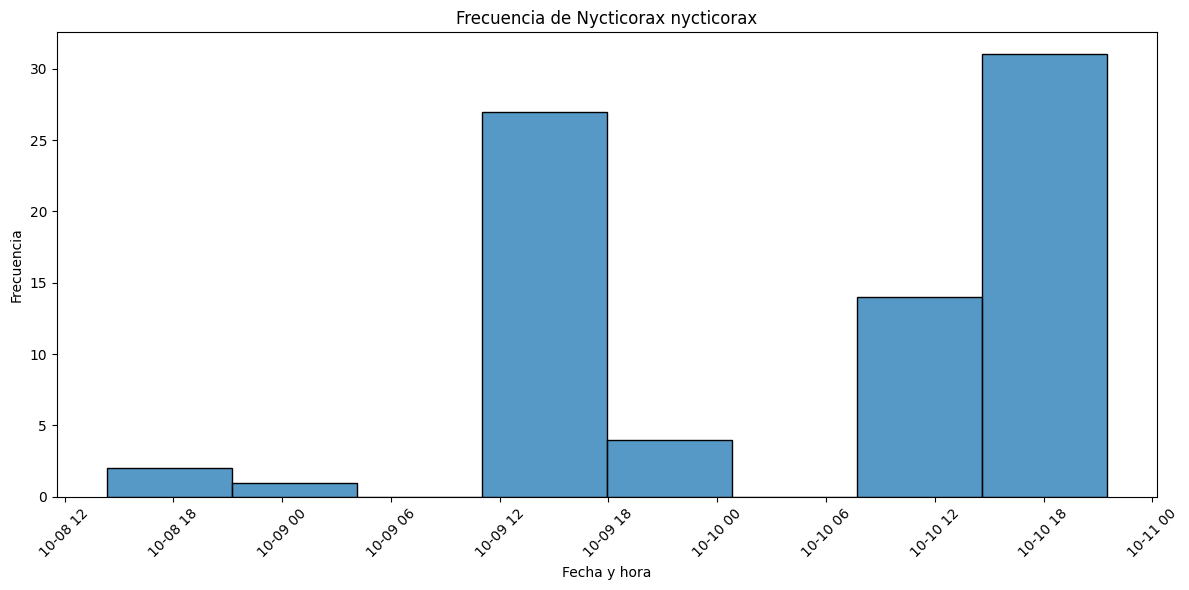

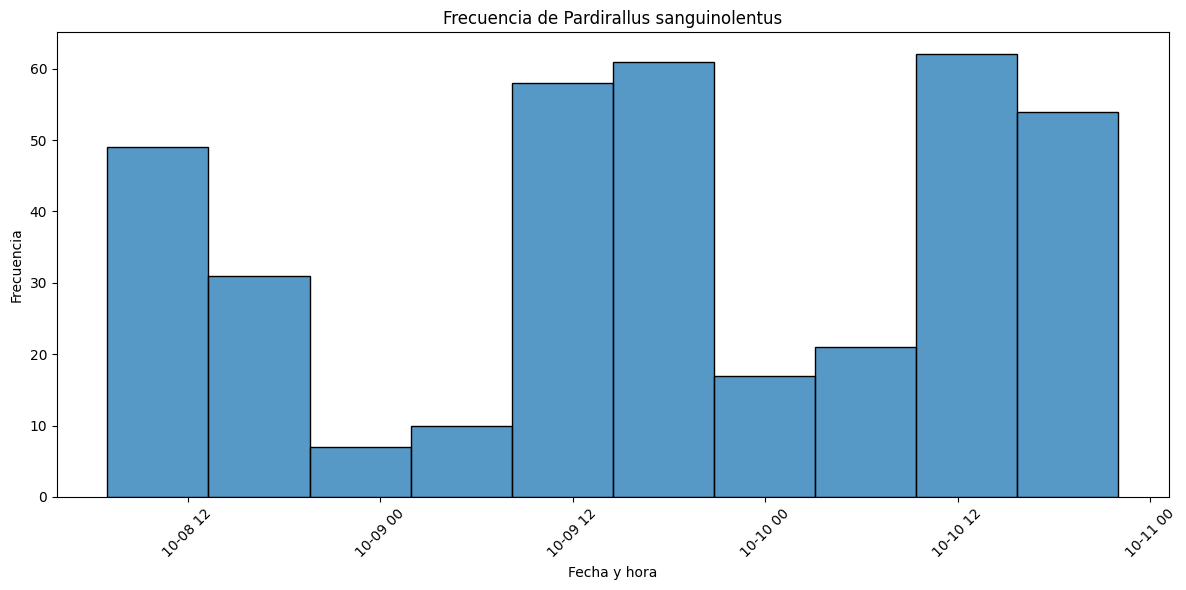

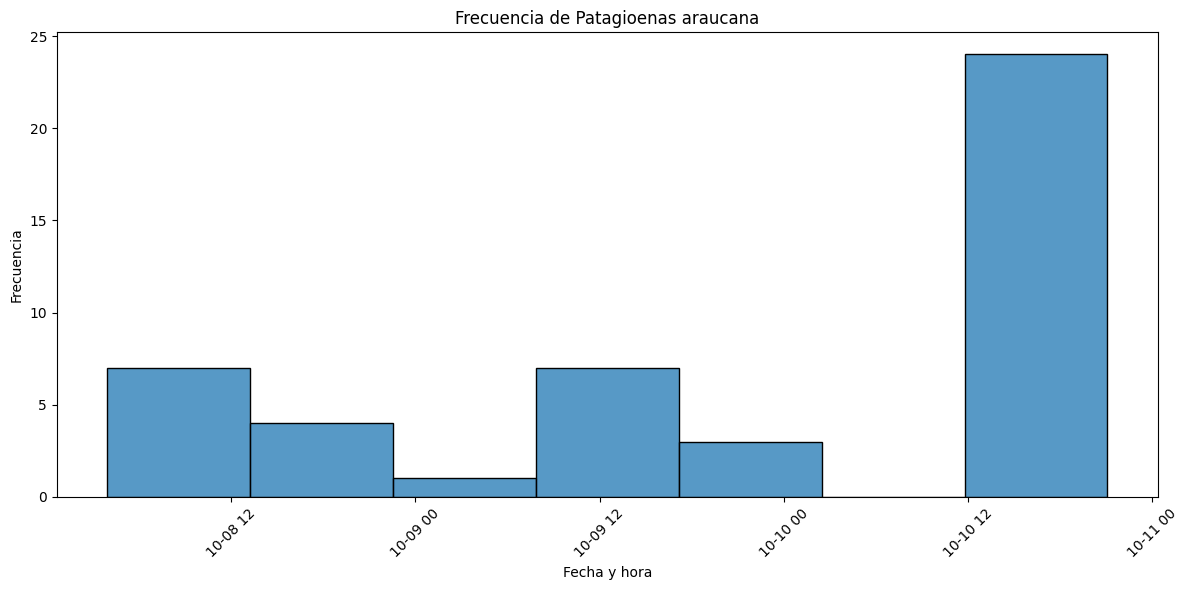

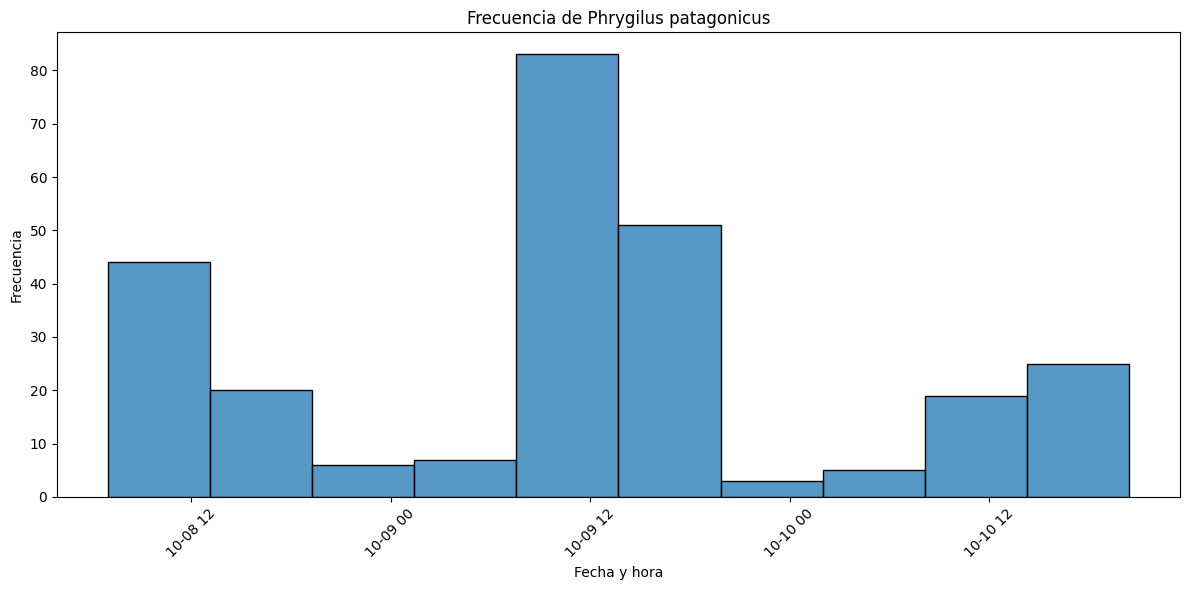

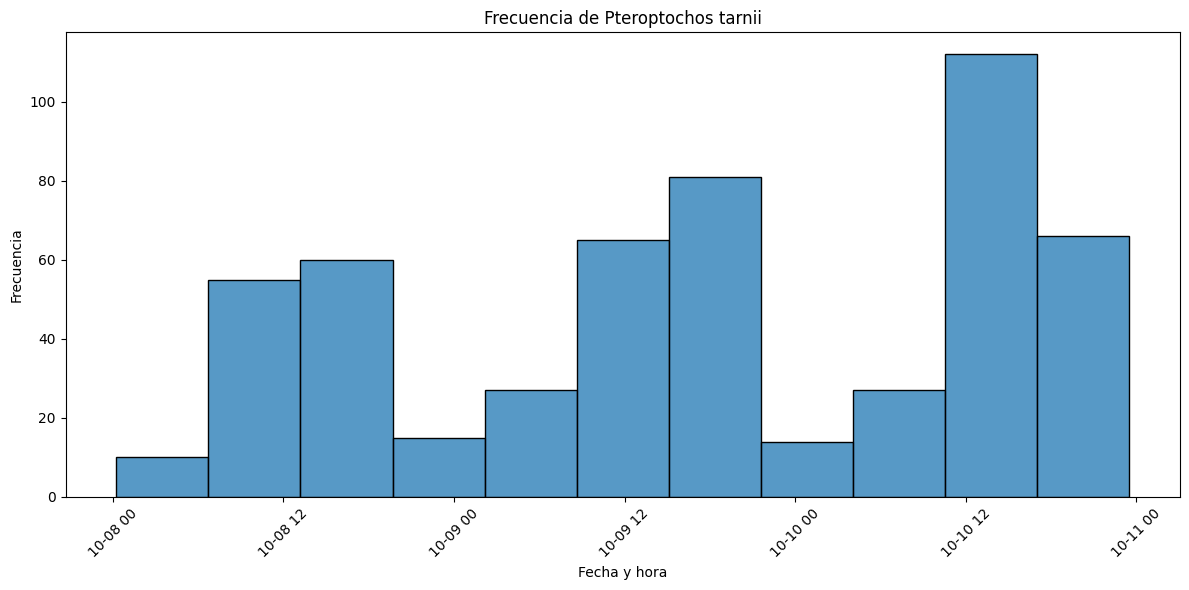

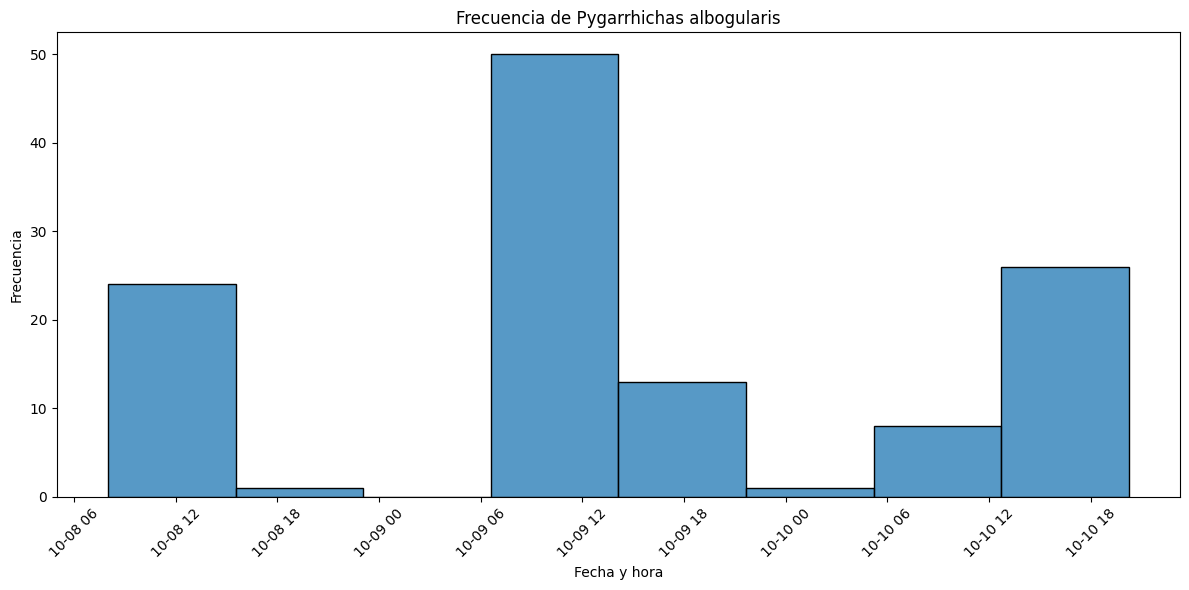

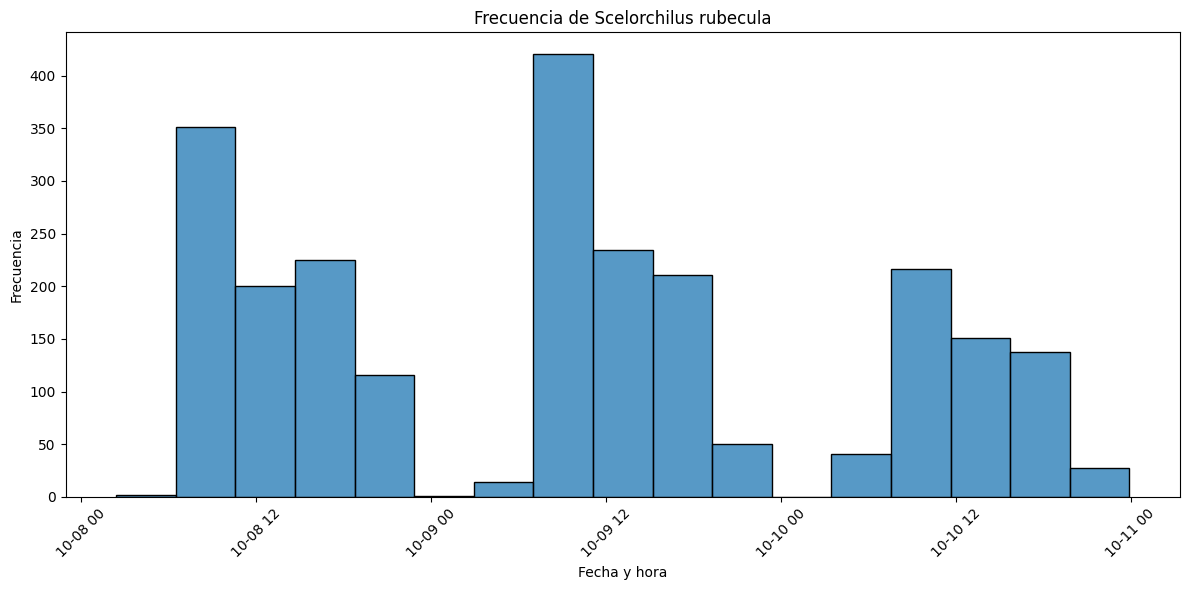

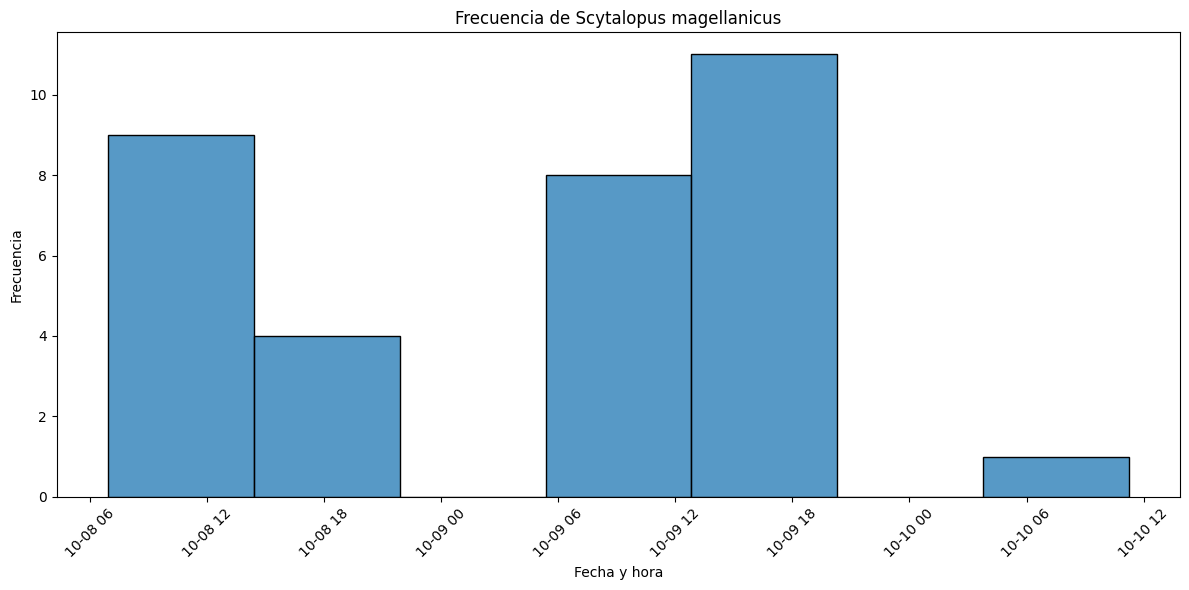

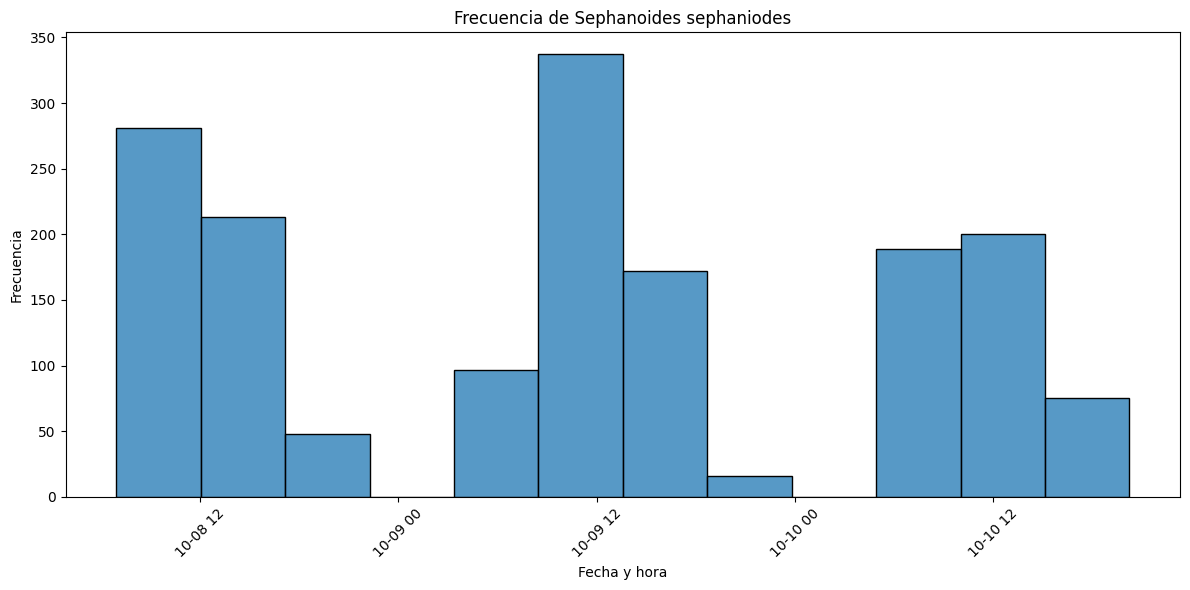

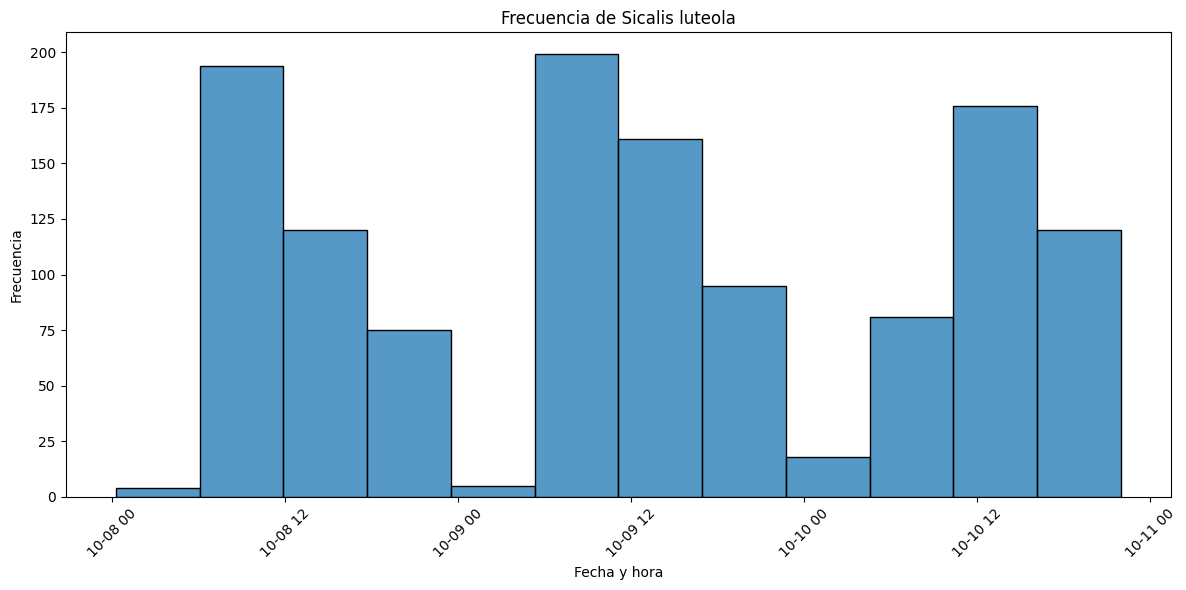

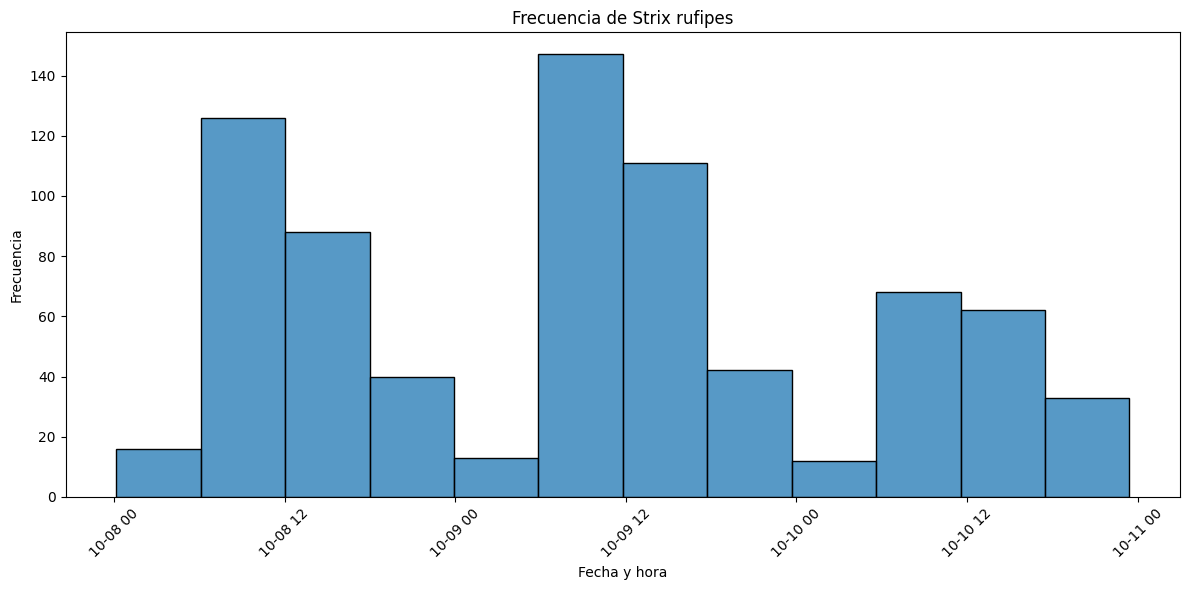

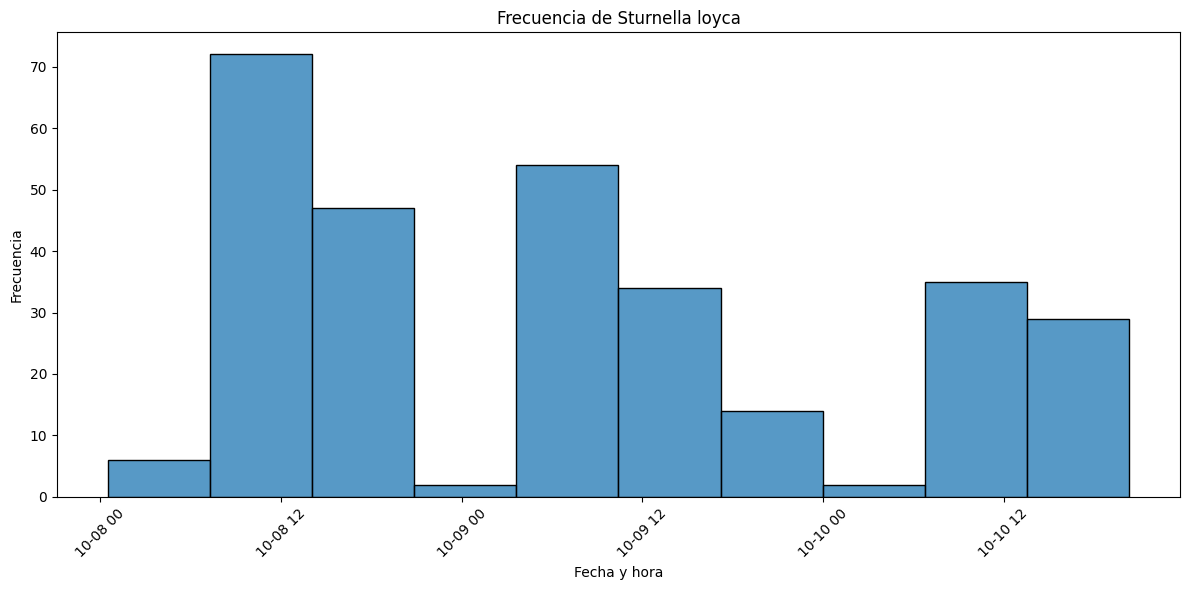

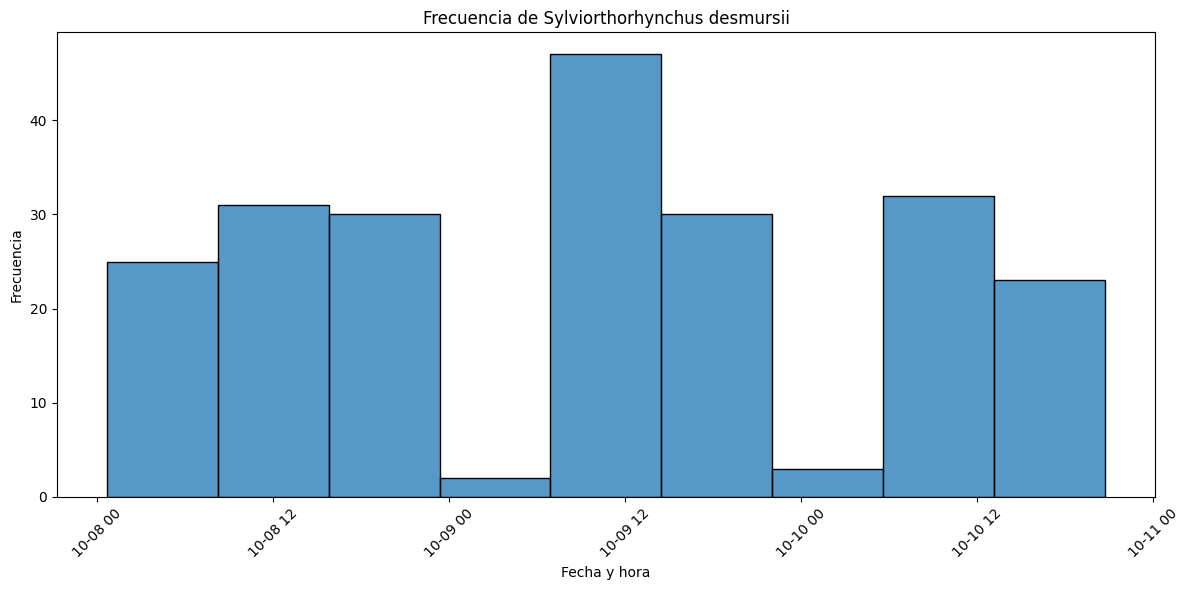

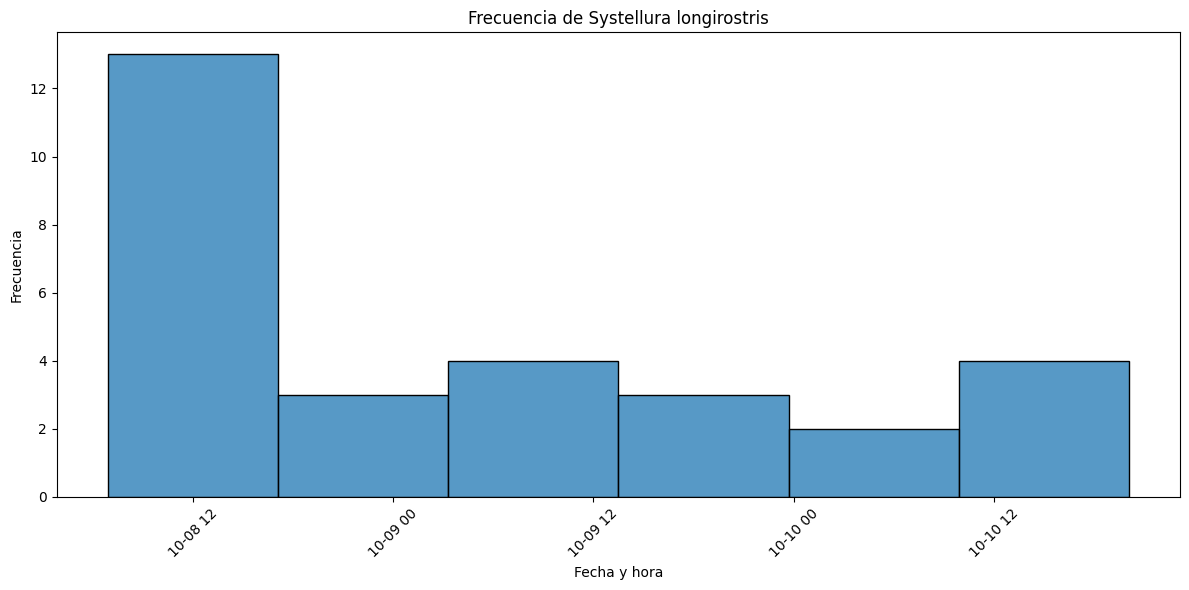

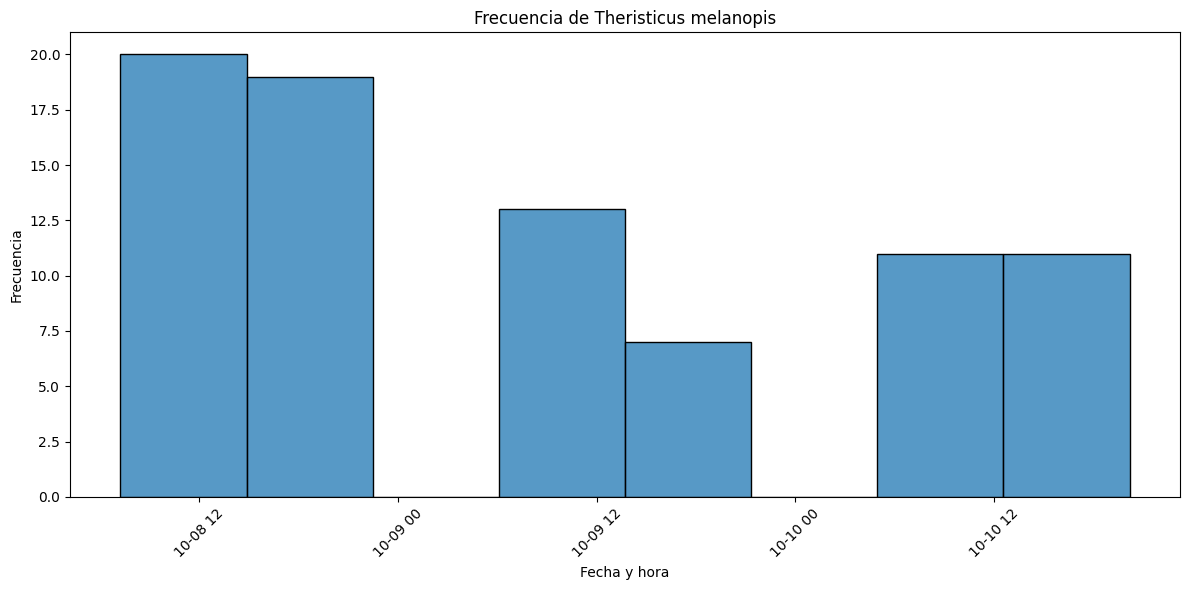

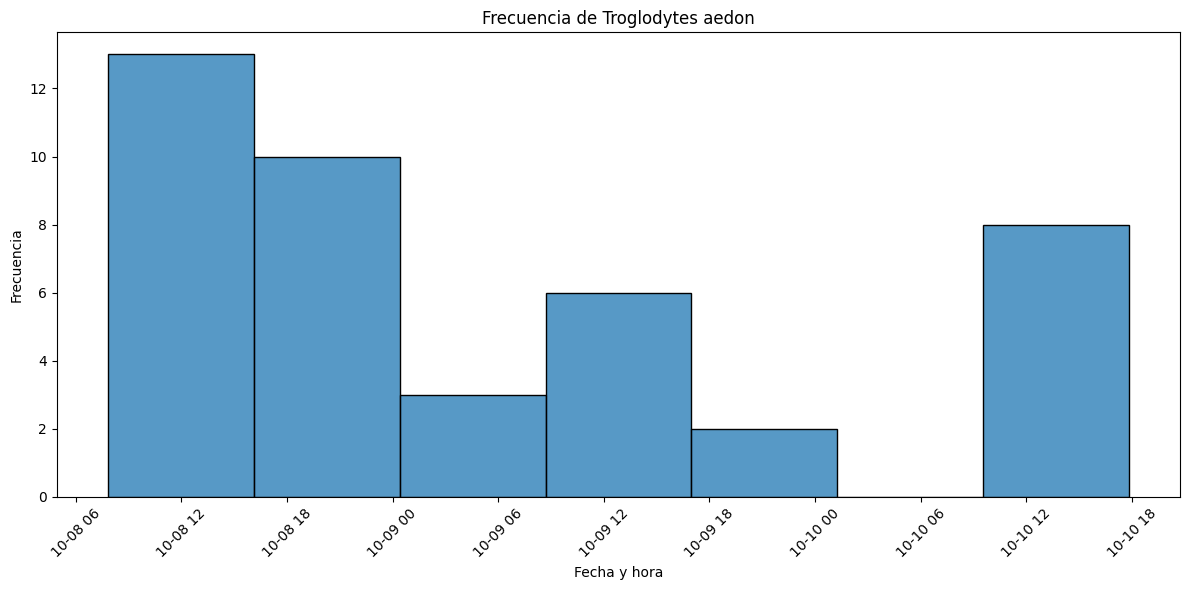

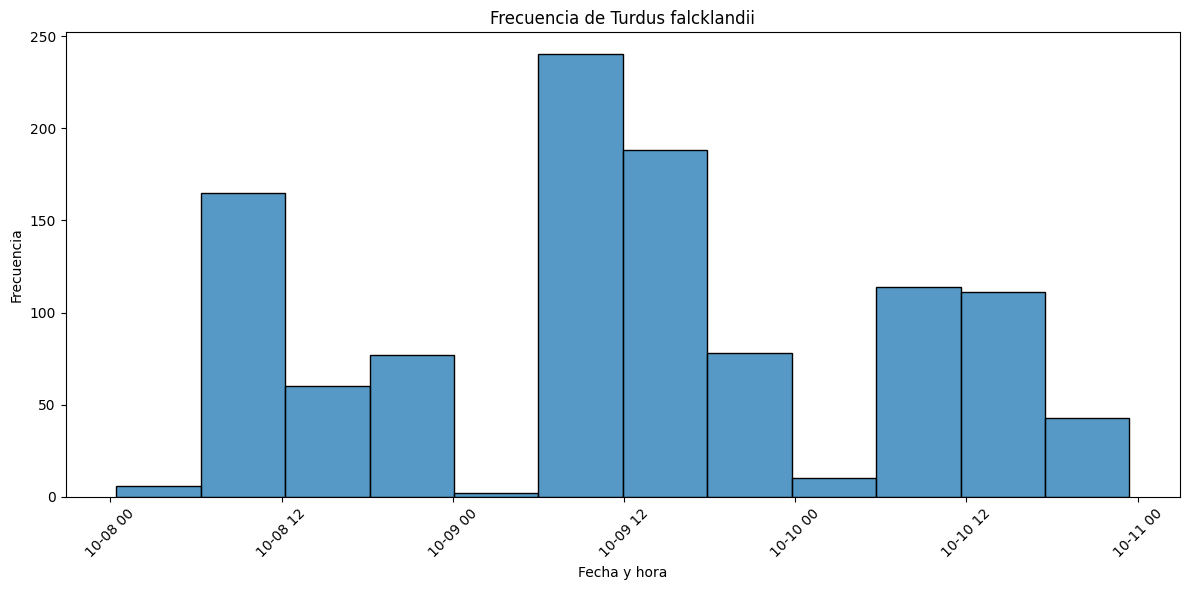

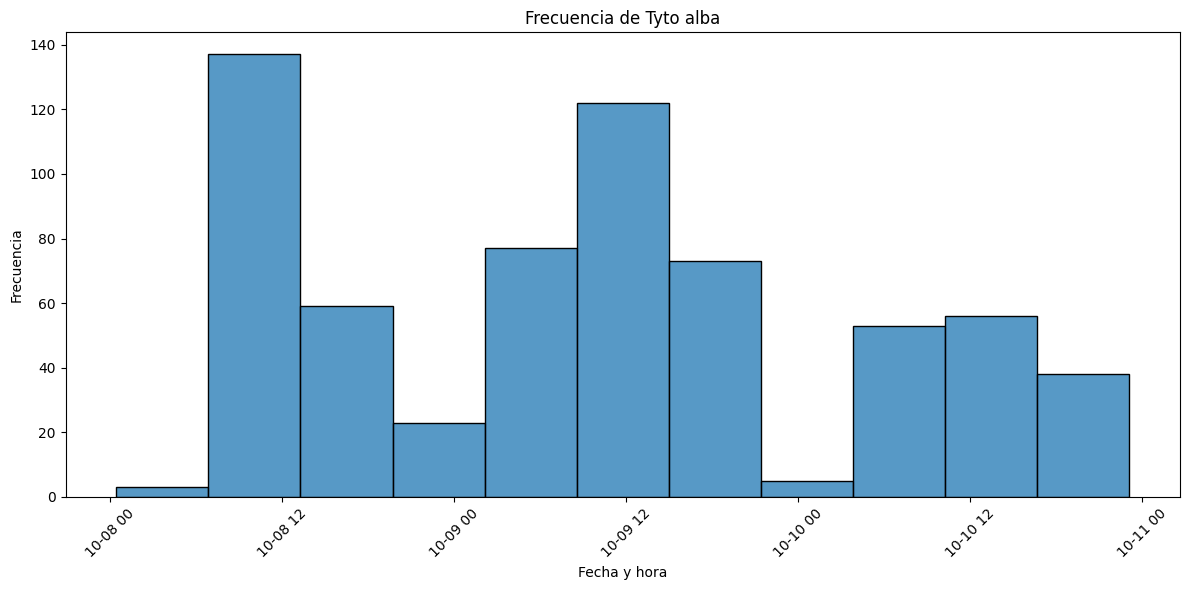

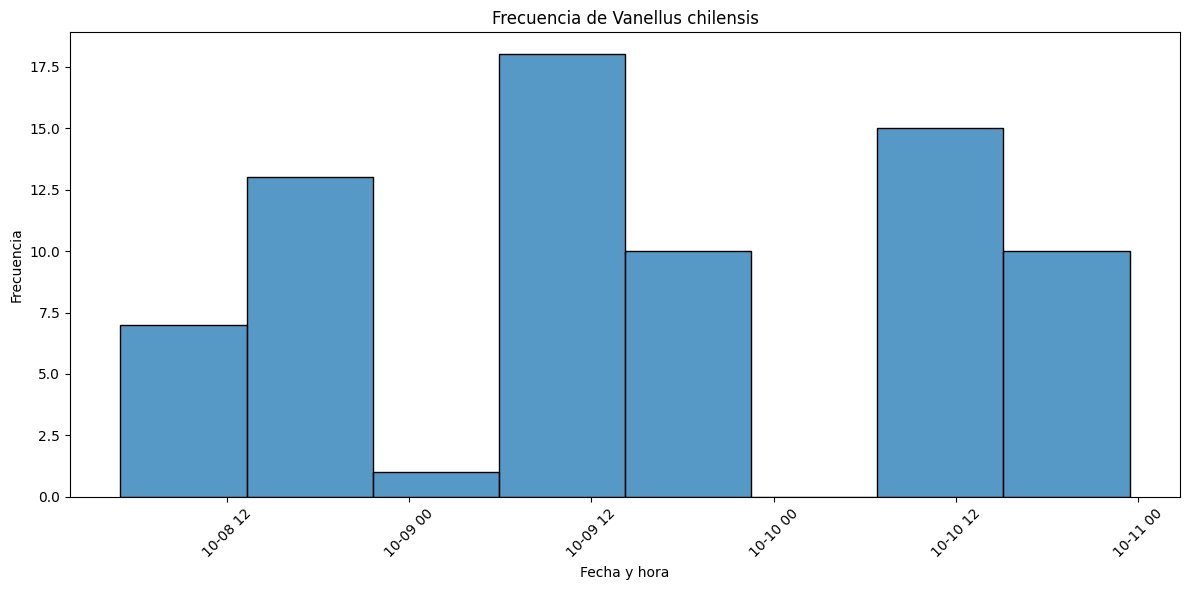

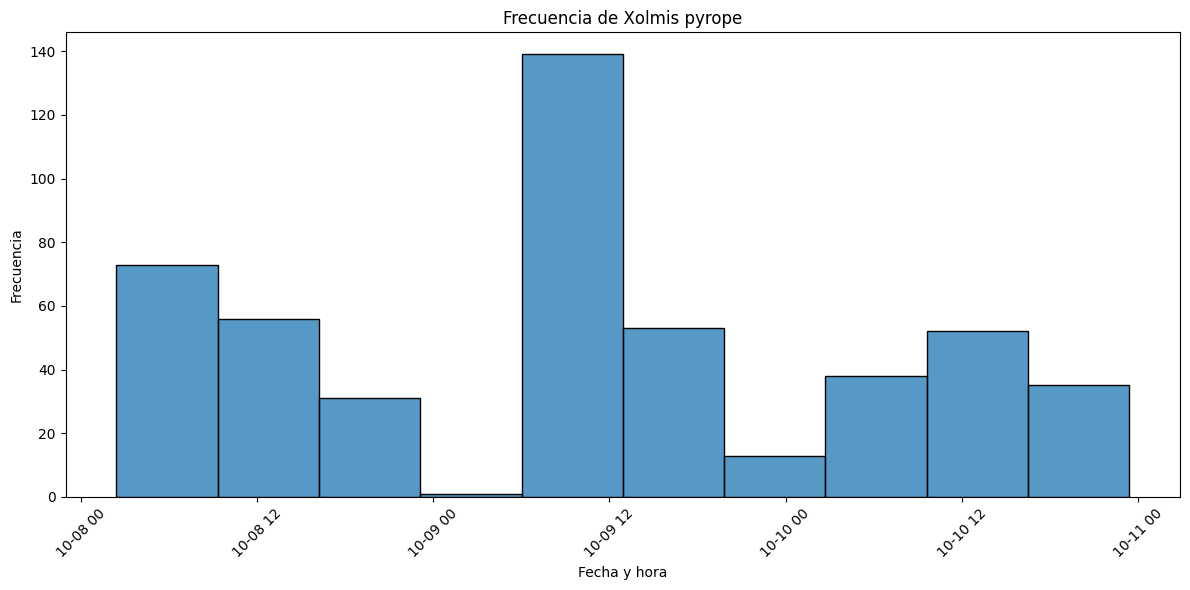

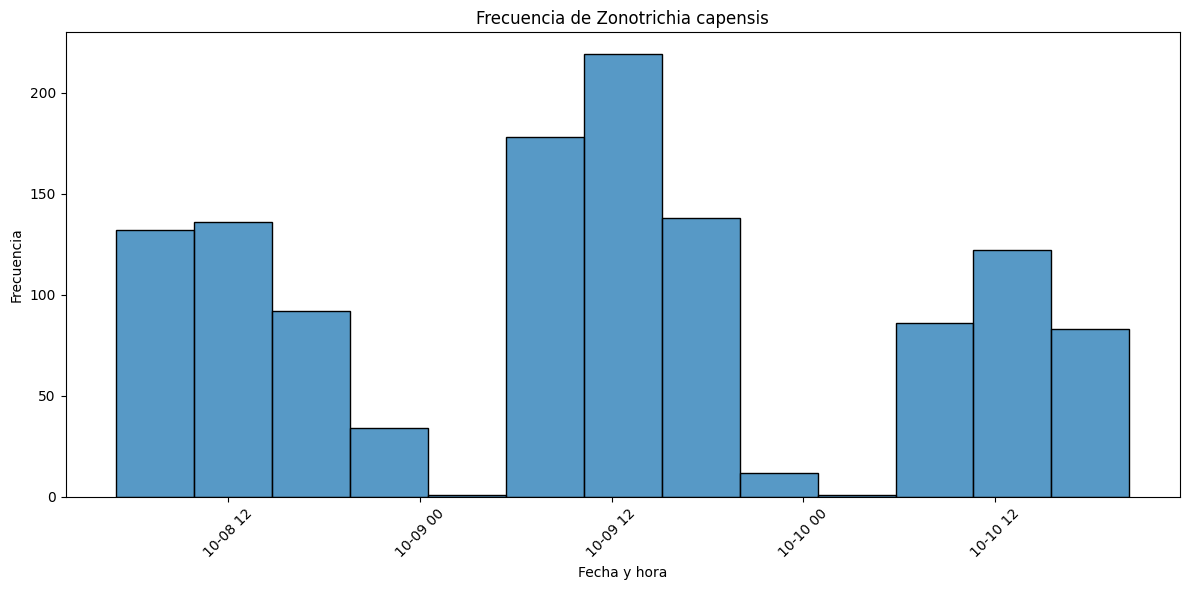

In [ ]:
# Asegúrate de que la columna 'datetime' sea de tipo datetime
data['datetime'] = pd.to_datetime(data['datetime'])

# Agrupa por 'species' y crea los gráficos
for species, data_species in data.groupby('species'):
    plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura
    sns.histplot(data=data_species, x='datetime', kde=False)  # kde=False para no mostrar la línea de densidad
    plt.title(f'Frecuencia de {species}')
    plt.xlabel('Fecha y hora')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor legibilidad
    plt.tight_layout()  # Ajusta el layout para que no se corten las etiquetas
    plt.show()


In [15]:
import pandas as pd

# Cargar el archivo CSV limpio y validado
data_path = r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\riqueza_validada.csv'
data = pd.read_csv(data_path)
data['datetime'] = pd.to_datetime(data['datetime'])

# 1. Crear un rango de fechas cada 5 minutos
start_date = data['datetime'].min().floor('D') #Fecha mínima del df
end_date = data['datetime'].max().ceil('D') #Fecha maxima del df
date_range = pd.date_range(start=start_date, end=end_date, freq='5min')

# 2. Crear un DataFrame con todas las combinaciones posibles
species_list = data['species'].unique()
site_list = data['site'].unique()

# Generar todas las combinaciones posibles
from itertools import product
combinations = product(date_range, species_list, site_list)

# Crear el DataFrame
all_combinations_df = pd.DataFrame(combinations, columns=['datetime', 'species', 'site'])

# 3. Combinar con tu DataFrame original
merged_df = pd.merge(all_combinations_df, data, on=['datetime', 'species', 'site'], how='left')

# 4. Imputar valores para las columnas restantes
# Por ejemplo, si quieres llenar los NaN con 0 o algún valor específico:
# Selecciona las columnas que quieres rellenar. Excluye las columnas clave ['datetime', 'species', 'site']
cols_to_fill = [col for col in merged_df.columns if col not in ['datetime', 'species', 'site']]
merged_df[cols_to_fill] = merged_df[cols_to_fill].fillna(0) # Rellenar con 0
# Si quieres rellenar con el valor más reciente, puedes usar:
# merged_df = merged_df.sort_values(by=['species', 'site', 'datetime']).fillna(method='ffill')

# 5. Establecer la clave primaria (opcional, pero recomendado)
merged_df['primary_key'] = merged_df['datetime'].astype(str) + '_' + merged_df['species'] + '_' + merged_df['site']
merged_df = merged_df.set_index('primary_key')

print(merged_df)


                                                     datetime  \
primary_key                                                     
2023-10-08 00:00:00_Theristicus melanopis_P04_S... 2023-10-08   
2023-10-08 00:00:00_Theristicus melanopis_P39_S... 2023-10-08   
2023-10-08 00:00:00_Theristicus melanopis_P23_S... 2023-10-08   
2023-10-08 00:00:00_Theristicus melanopis_P16_S... 2023-10-08   
2023-10-08 00:00:00_Theristicus melanopis_P13_S... 2023-10-08   
...                                                       ...   
2023-10-11 00:00:00_Turdus falcklandii_P40_SMM0... 2023-10-11   
2023-10-11 00:00:00_Turdus falcklandii_P33-SMM0... 2023-10-11   
2023-10-11 00:00:00_Turdus falcklandii_P35-SMM0... 2023-10-11   
2023-10-11 00:00:00_Turdus falcklandii_P37-SMM0... 2023-10-11   
2023-10-11 00:00:00_Turdus falcklandii_P41-SMM0... 2023-10-11   

                                                                  species  \
primary_key                                                                 


In [18]:
merged_df.to_csv(r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\riqueza_fulltime_fullspecies.csv', index=False)

In [4]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV limpio y validado
data_path = r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\riqueza_validada.csv'
data = pd.read_csv(data_path)
data['datetime'] = pd.to_datetime(data['datetime'])


# Redondear o truncar los valores datetime al intervalo de 5 minutos más cercano (hacia abajo)
data['datetime_5min'] = data['datetime'].dt.floor('5T')

# Crear un rango completo de datetime cada 5 minutos desde el mínimo al máximo
start_date = pd.to_datetime('2023-10-08 00:00:00') # Fecha mínima del df
end_date = data['datetime_5min'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='5T')

# Obtener lista única de sites
sites = data['site'].unique()

# Crear todas las combinaciones posibles de datetime cada 5 minutos y site
from itertools import product
all_combinations = pd.DataFrame(product(date_range, sites), columns=['datetime_5min', 'site'])

# Agrupar el DataFrame original para contar especies únicas por datetime_5min y site
grouped = data.groupby(['datetime_5min', 'site'])['species'].nunique().reset_index()
grouped = grouped.rename(columns={'species': 'species_count'})

# Hacer merge para tener todas las combinaciones y rellenar con 0 donde no haya datos
result = pd.merge(all_combinations, grouped, on=['datetime_5min', 'site'], how='left')
result['species_count'] = result['species_count'].fillna(0).astype(int)

print(result)



            datetime_5min          site  species_count
0     2023-10-08 00:00:00  P04_SMM09557              0
1     2023-10-08 00:00:00  P39_SMM09309              0
2     2023-10-08 00:00:00  P23_SMM09360              0
3     2023-10-08 00:00:00  P16_SMM09317              0
4     2023-10-08 00:00:00  P13_SMM09539              0
...                   ...           ...            ...
20731 2023-10-10 23:55:00  P40_SMM09245              0
20732 2023-10-10 23:55:00  P33-SMM09684              0
20733 2023-10-10 23:55:00  P35-SMM09330              0
20734 2023-10-10 23:55:00  P37-SMM09595              0
20735 2023-10-10 23:55:00  P41-SMM09350              0

[20736 rows x 3 columns]


C:\Users\camil\AppData\Local\Temp\ipykernel_1476\1503562421.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data['datetime_5min'] = data['datetime'].dt.floor('5T')
C:\Users\camil\AppData\Local\Temp\ipykernel_1476\1503562421.py:16: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq='5T')


In [25]:
result.to_csv(r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\riqueza_fulltime.csv', index=False)